WITH OUT USING GRADIENT DESCENT

IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

INPUT OF X,Y TRAIN

In [3]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

B AND W VALUES

In [4]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

CODE FOR MODEL

In [78]:
def predict_single_loop(w,b,X):
    m=X.shape[0]
    p=0
    for i in range(m):
        p_i=X[i]*w[i]
        p=p+p_i
    p=p+b
    return p


TEST BY INPUT VALUE OF 2

In [84]:

X_vec=X_train[2,:]
print(X_vec.shape,X_vec)
f_wb=predict_single_loop(w_init,b_init,X_vec)
print(f_wb.shape,f_wb)



(4,) [852   2   1  35]
() 177.99999898940814


TIME TAKEN FOR THIS MODEL

In [85]:
import time
tic=time.time()
predict_single_loop(w_init,b_init,X_vec)
toc=time.time()
print(toc-tic)

8.392333984375e-05


USE DOT PRODECT VECTORIZATION

In [86]:
def vinoth(X,w,b):
  p=np.dot(w,X)+b
  return p

TIME TAKEN

In [88]:
tic=time.time()
p=np.dot(w_init,X_vec)+b_init
toc=time.time()
print(toc-tic)

0.0001704692840576172


VECTORIZARTION IS BEST TO REDUCE TIME OF MODEL

NOW, USING GRADIENT DESCENT

COMPUTE COST

In [89]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(X[i],w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost

In [11]:
cost=compute_cost(X_train,y_train,w_init,b_init)
print(cost)

1.5578904428966628e-12


COMPUTE GRADIENT THAT IS DERIVATIVE OF D_w AND D_b

In [90]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_dw=np.zeros((n,))
    dj_db=0.0
    for i in range(m):
        err=(np.dot(X[i],w)+b)-y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err*X[i,j]
        dj_db=dj_db+err
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db



GRADIENT DESCENT

In [92]:
import copy
import math
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):



    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        dj_dw,dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            J_history.append( cost_function(X, y, w, b))

    return w, b, J_history



In [93]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

TEST MODEL BY GIVING ALPHA AND ITERATIONS

In [94]:

m=X_train.shape[0]
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.

iterations = 10000
alpha = 5.0e-7

w_final, b_final, J_history = gradient_descent(X_train, y_train, initial_w, initial_b,compute_cost, compute_gradient,alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: -0.02,[ 0.21699899  0.03240792 -0.10755879 -0.5799772 ] 
prediction: 430.50, target value: 460
prediction: 283.93, target value: 232
prediction: 164.52, target value: 178


PLOT FOR VISUALIZATION OF MODEL

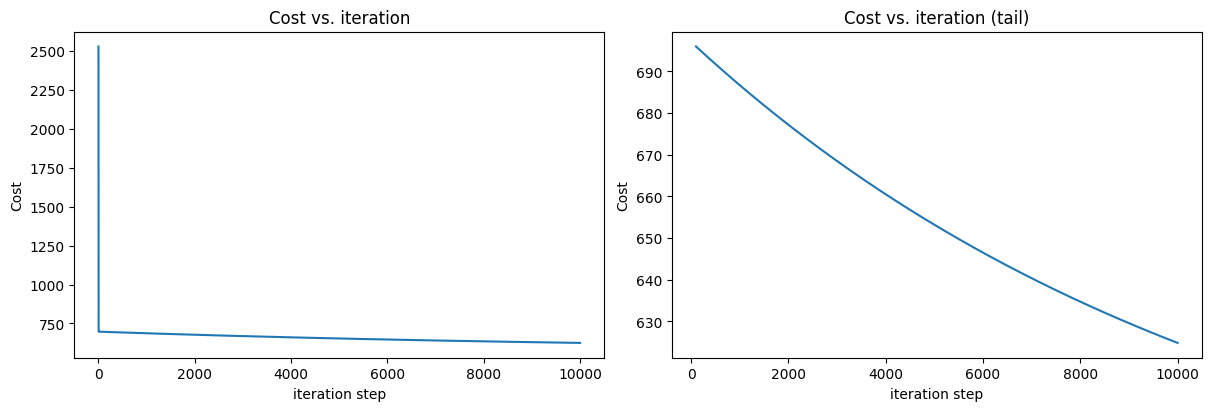

In [45]:

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()


END